# **CHAPTER 4. Densoviruses**

**Install conda env and activate it**

```
conda env create -f denso.yaml
```

```
conda activate denso
```

## **Part 1. Prepare to extract densoviruses from MAGs**

Create a directory where complete genomes of densoviruses from `RefSeq` database will be stored

In [1]:
! mkdir genbank_seqs

Download densoviruses complete genomes from `RefSeq` database to `genbank_seqs/refseq_densoviruses.fa` file

In [4]:
! esearch -email iljapopov17@gmail.com -db nucleotide -query 'Densovirus AND "complete genome" AND srcdb_refseq[PROP]' | efetch -format fasta -mode text > genbank_seqs/densoviruses_genomes.fa

Create a directory where `BLAST` custom database of densoviruses complete genomes will be stored

In [8]:
! mkdir densovirus_blast_db

Create `BLAST` database

In [9]:
! makeblastdb -in refseq_seqs/refseq_densoviruses.fa -dbtype nucl -out densovirus_blast_db/densovirus_db



Building a new DB, current time: 08/06/2024 18:02:19
New DB name:   /home/user/BatMetagenome2x150/Clean_journals/Densoviruses/densovirus_custom_db/densovirus_db
New DB title:  refseq_seqs/refseq_densoviruses.fa
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 56 sequences in 0.022052 seconds.




## **Part 2. Extract densoviruses from MAGs**

>Disclaimer: it is important to install `VirSorter2` with all the requirements and dependecies. <br>
> Although `VirSorter2` will be installed with `denso.yaml` conda envinronment it is also important to install the database needed. Please follow the official [installation guide](https://github.com/jiarong/VirSorter2#download-database-and-dependencies)<br>
> In the `denso.yaml` `VirSorter2` is already installed with `conda` so proceed to:
> ```
># just in case there is a failed attemp before; 
>#   remove the whole diretory specified by -d
>rm -rf virsorter_db
># run setup
>virsorter setup -d virsorter_db -j 4
> ```

`VirExtr_pipeline` is a Snakemake pipeline that runs filtered MAGs from the previous chapter against custom `BLAST` database with reference genomes of densoviruses. Then it extracts longest alignment sequences to a `.fasta` files. Finally, it runs `VirSorter2` to assess viral genomes.

In [ ]:
! snakemake -s VirExtr_pipeline --cores all --use-conda

As the result of this pipeline:
- `BLAST` results are stored in `BLAST_vs_densovirus` folder<br>
- Extracted densoviruses are stored in `viral_genomes` folder<br>
- `VirSorter2` results are sorted in `VirSorted2_results` folder

Extracted densoviruses genomes are named like this:<br>
`>NODE_632_length_4705_cov_657475.178280`<br>
It is no use! `Prokka` will not take it as an input as the seqs names are too long<br>

That is why we will rename sequences:<br>
- Densoviruses from `D` samples will be renamed to `Densovirinae_sp._isolate_RBHC_VM_#`<br>
- Densoviruses from `P` samples will be renamed to `Densovirinae_sp._isolate_RBHC_NN_#`<br>

`VM` stands for _Vespertilio murinus_<br>
`NN` stands for _Nyctalus noctula_

In [7]:
# Usage
# {path_to_script} {path_to_input_folder}
%run scripts/rename_seqs.py viral_genomes/

Let's check how the script worked

In [1]:
! head -1 viral_genomes/Densovirus_D1.fasta

>Densovirinae_sp._isolate_RBHC_VM_1


That's it!

## **Part 3. Prepare for genome annotation of densoviruses**

Download densoviruses proteins from `Protein` database to `genbank_seqs/densoviruses_proteins.fa` file

In [5]:
! esearch -email iljapopov17@gmail.com -db protein -query 'Densovirus' | efetch -format fasta -mode text > genbank_seqs/densoviruses_proteins.fa

## **Part 4. Genome annotation of densoviruses**

### **Part 4.1. Genome annotation**

`GA_pipeline` is a Snakemake pipeline that annotates isolated from MAGs densoviral genomes with `prokka` and densoviruses proteins from NCBI `Proteins` database downloaded in the cell above.

In [ ]:
! snakemake -s GA_pipeline --cores all

As the result of this pipeline:
- `prokka` results are stored in `prokka_results` folder

### **Part 4.2. Fix `prokka` `.gbk` outputs**

Let's look at the `.gbk` files, especially at the 1st row of the file

In [8]:
! head -1 prokka_results/annotated_densovirus_D1/Densovirus_D1_annot.gbk

LOCUS       Densovirinae_sp._isolate_RBHC_VM_14705 bp   DNA linear


Well... `prokka` makes a headache problem...<br>
There is no space between sample number and seq length! `Proksee` will not take this `.gbk` as an input!<br>
Let's fix it!

`scripts/add_space_gbk.py` will fix "space problem". Just run this script. It will make changes exactly in the same file.

In [6]:
# Usage
# {path_to_script}
%run scripts/add_space_gbk.py

Processing file: prokka_results/annotated_densovirus_D1/Densovirus_D1_annot.gbk
Processing file: prokka_results/annotated_densovirus_D2/Densovirus_D2_annot.gbk
Processing file: prokka_results/annotated_densovirus_D3/Densovirus_D3_annot.gbk
Processing file: prokka_results/annotated_densovirus_D4/Densovirus_D4_annot.gbk
Processing file: prokka_results/annotated_densovirus_D5/Densovirus_D5_annot.gbk
Processing file: prokka_results/annotated_densovirus_P1/Densovirus_P1_annot.gbk
Processing file: prokka_results/annotated_densovirus_P2/Densovirus_P2_annot.gbk
Processing file: prokka_results/annotated_densovirus_P3/Densovirus_P3_annot.gbk
Processing file: prokka_results/annotated_densovirus_P4/Densovirus_P4_annot.gbk
Processing file: prokka_results/annotated_densovirus_P5/Densovirus_P5_annot.gbk


In [9]:
! head -1 prokka_results/annotated_densovirus_D1/Densovirus_D1_annot.gbk

LOCUS       Densovirinae_sp._isolate_RBHC_VM_1 4705 bp   DNA linear


Hooray!

### **Part 4.3. Visualize**

Please visit [`Proksee`](https://proksee.ca/) website and upload `.gbk` files from `prokka_results/annotated_densovirus_{sample}` folders.

## **Part 5. Comparison of densoviruses**

### **Part 5.1. Install `fastANI`**

Download it from `GitHub`

In [ ]:
! wget https://github.com/ParBLiSS/FastANI/releases/download/v1.34/fastANI-linux64-v1.34.zip

Make directory to store `ANI` files and results

In [ ]:
! mkdir ANI

Unzip donwloaded from `GitHub` archive and delete it

In [ ]:
! unzip fastANI-linux64-v1.34.zip -d ANI && rm -rf fastANI-linux64-v1.34.zip

### **Part 5.2. Run `fastANI`**

In [ ]:
! ANI/fastANI --ql ANI/querylist.txt --rl ANI/reflist.txt -o ANI/fastani.out --matrix

### **Part 5.3. Visualize**

Rename `viral_genomes/Densovirus_{sample}.fasta` to `Densovirinae_sp._isolate_RBHC_{sample}`

In [80]:
# Load the contents of the file
file_path = 'ANI/fastani.out'

with open(file_path, 'r') as file:
    file_content = file.read()

# Define the mapping for renaming the files
rename_map = {
    "viral_genomes/Densovirus_D1.fasta": "Densovirinae_sp._isolate_RBHC_VM_1",
    "viral_genomes/Densovirus_D2.fasta": "Densovirinae_sp._isolate_RBHC_VM_2",
    "viral_genomes/Densovirus_D3.fasta": "Densovirinae_sp._isolate_RBHC_VM_3",
    "viral_genomes/Densovirus_D4.fasta": "Densovirinae_sp._isolate_RBHC_VM_4",
    "viral_genomes/Densovirus_D5.fasta": "Densovirinae_sp._isolate_RBHC_VM_5",
    "viral_genomes/Densovirus_P1.fasta": "Densovirinae_sp._isolate_RBHC_NN_1",
    "viral_genomes/Densovirus_P2.fasta": "Densovirinae_sp._isolate_RBHC_NN_2",
    "viral_genomes/Densovirus_P3.fasta": "Densovirinae_sp._isolate_RBHC_NN_3",
    "viral_genomes/Densovirus_P4.fasta": "Densovirinae_sp._isolate_RBHC_NN_4",
    "viral_genomes/Densovirus_P5.fasta": "Densovirinae_sp._isolate_RBHC_NN_5",
}

# Replace the names in the file content
for old_name, new_name in rename_map.items():
    file_content = file_content.replace(old_name, new_name)

# Save the updated content back to the file
with open(file_path, 'w') as file:
    file.write(file_content)

Import needed `python` modules

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Make directory to store output image

In [86]:
! mkdir images

Create heatmap!<br>
As viruses are extremelly alike the minimal value is set to 98.6

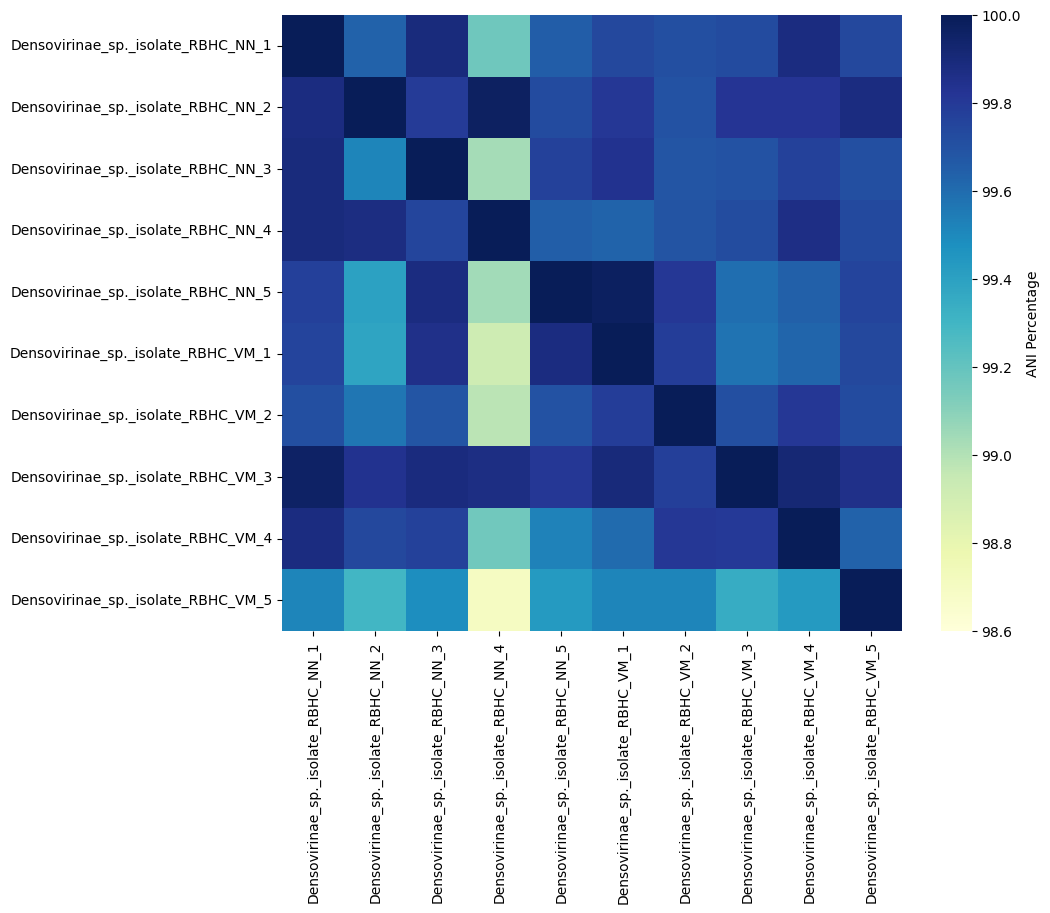

In [ ]:
with open('ANI/fastani.out', 'r') as file:
    content = file.readlines()

# Extracting the necessary data from the file
data = []
for line in content:
    parts = line.strip().split('\t')
    genome1 = parts[0].split('/')[-1]
    genome2 = parts[1].split('/')[-1]
    ani_value = float(parts[2])
    data.append([genome1, genome2, ani_value])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Genome1', 'Genome2', 'ANI'])

# Creating a pivot table for the heatmap
pivot_table = df.pivot(index='Genome1', columns='Genome2', values='ANI')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, annot=False, cmap='YlGnBu', cbar_kws={'label': 'ANI Percentage'}, vmin=98.6, vmax=100)
#plt.xticks(rotation=45, ha='right')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('images/fastANI_heatmap_x90.png', dpi=600, bbox_inches='tight')

## **Part 6. Phylogenomics**

### **Part 6.1. Preparation**

Make directory for all the `phylogenomics` data

In [30]:
! mkdir phylogenomics
! mkdir phylogenomics/data/
! mkdir phylogenomics/data/proteomes/

Copy densoviruses amino acid sequences produces by `prokka` to `phylogenomics/data/proteomes/` directory

In [31]:
! cp prokka_results/*/*_annot.faa phylogenomics/data/proteomes/

Fetch the list of accession numbers of all the densoviruses from the `RefSeq` database<br>

**NB!** Date of accession is Aug 2024

In [32]:
! esearch -db nucleotide -query '("Ambidensovirus"[Organism] OR "densovirus"[All Fields]) AND "complete genome"[All Fields] AND (viruses[filter] AND refseq[filter] AND ("3000"[SLEN] : "6500"[SLEN]))' | efetch -format acc > phylogenomics/data/accession_numbers.txt

In [33]:
! echo "MW628494.1" >> phylogenomics/data/accession_numbers.txt

Import `Entrez` from `Biopython` and `os`

In [34]:
from Bio import Entrez
import os

Set the email (NCBI requires it for identification)

In [35]:
Entrez.email = "iljapopov17@gmail.com"

Function that will download amino acid sequences from the entries from the list of accession numbers

In [36]:
# Function to download proteomes from NCBI
def download_proteome(accession, output_dir):
    # EFetch to download the fasta_cds_aa file
    handle = Entrez.efetch(db="nuccore", id=accession, rettype="fasta_cds_aa", retmode="text")
    data = handle.read()
    handle.close()
    
    # Save the fasta data
    output_file = os.path.join(output_dir, f"{accession}_proteome.fasta")
    with open(output_file, "w") as f:
        f.write(data)
    print(f"Downloaded: {accession}")

# Function to process the list of accession numbers
def process_accession_list(file_path, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Read the accession numbers from the file
    with open(file_path, "r") as file:
        accessions = [line.strip() for line in file.readlines()]
    
    # Download each proteome
    for accession in accessions:
        download_proteome(accession, output_dir)

Run the function to download amino acid sequences of densoviruses from `RefSeq` database

In [ ]:
# Input: File with accession numbers and output directory
accession_file = "phylogenomics/data/accession_numbers.txt"
output_directory = "phylogenomics/data/proteomes/"

# Run the process
process_accession_list(accession_file, output_directory)

### **Part 6.2. "Sequence brushing"**

Let's look at the sequences' names

In [38]:
! head -1 phylogenomics/data/proteomes/Densovirus_D1_annot.faa

>KCBIPIHA_00001 structural protein [Blattella germanica densovirus-like virus]


In [39]:
! head -1 phylogenomics/data/proteomes/NC_000936.1_proteome.fasta

>lcl|NC_000936.1_prot_NP_051016.1_1 [locus_tag=PfdVgp1] [db_xref=GeneID:1457168] [protein=structural protein] [protein_id=NP_051016.1] [location=202..930] [gbkey=CDS]


It looks informative, but awful. We will use `Proteinortho` later. And this tool will not take these sequences as the input because of their seqs' names. We must rename them. It will be not a simple process. That's why it will be in several steps.

Make directory to store renamed sequences<br>
And make enough directories to allow step-by-step process

In [40]:
! mkdir phylogenomics/data/proteomes_renamed/
! mkdir phylogenomics/data/proteomes_renamed/round_1/
! mkdir phylogenomics/data/proteomes_renamed/round_2/
! mkdir phylogenomics/data/proteomes_renamed/round_3/

#### **Part 6.2.1. Round 1**

For the 1st round we will:

- Make this `>KCBIPIHA_00001 structural protein [Blattella germanica densovirus-like virus]` look like this `>structural protein`<br>
- Make this `>lcl|NC_000936.1_prot_NP_051016.1_1 [locus_tag=PfdVgp1] [db_xref=GeneID:1457168] [protein=structural protein] [protein_id=NP_051016.1] [location=202..930] [gbkey=CDS]` look like this `>structural protein`

So we will delete everything except the gene names

In [41]:
%%bash

for file in phylogenomics/data/proteomes/*_annot.faa
do sed -E 's/^>([^ ]+) ([^[]+)\[.*\]/>\2/' $file > phylogenomics/data/proteomes_renamed/round_1/$(basename "$file" _annot.faa)_renamed.fa
done

In [42]:
%%bash

for file in phylogenomics/data/proteomes/*.fasta
do sed -E 's/^>.*\[protein=([^]]+)\].*/>\1/' $file > phylogenomics/data/proteomes_renamed/round_1/$(basename "$file" _proteome.fasta)_renamed.fa
done

Let's check if `sed` did good

In [43]:
! head -1 phylogenomics/data/proteomes_renamed/round_1/Densovirus_D1_renamed.fa

>structural protein 


In [44]:
! head -1 phylogenomics/data/proteomes_renamed/round_1/NC_000936.1_renamed.fa

>structural protein


Perfect. Let's move on the 2nd round

#### **Part 6.2.2. Round 2**

First we need to install `BBMap`

Download `.tar.gz` archive

In [ ]:
! wget https://sourceforge.net/projects/bbmap/files/latest/download -O BBMap.tar.gz

Unpack it

In [ ]:
! tar -xvzf BBMap.tar.gz

Delete the initial archive

In [ ]:
! rm -rf BBMap.tar.gz

For the 2nd round we will:

- Make this `>structural protein` look like this: `>NC_000936.1_structural protein`<br>

So, we will make each sequence unique by binding the information of which exactly virus this gene is

In [ ]:
%%bash

for file in phylogenomics/data/proteomes_renamed/round_1/*_renamed.fa
do export species_name=$(basename $file _renamed.fa)
bbmap/rename.sh in=$file prefix="$species_name" addprefix=true out=phylogenomics/data/proteomes_renamed/round_2/$species_name.fa ignorejunk=true ;
done

Let's check if `BBMap` did good

In [47]:
! head -1 phylogenomics/data/proteomes_renamed/round_2/NC_000936.1.fa

>NC_000936.1_structural protein


Perfect

#### **Part 6.2.3. Round 3**

For the 3rd round we will:

- Make this `>Densovirus_P3_structural protein` look like this: `>Densovirus_P3_structural_protein_`<br>

So, we will replace each space with underline

In [48]:
%%bash

for file in phylogenomics/data/proteomes_renamed/round_2/*.fa
do sed -E '/^>/ s/ /_/g' $file > phylogenomics/data/proteomes_renamed/round_3/$(basename "$file")
done

Let's check if `sed` did good

In [49]:
! head -1 phylogenomics/data/proteomes_renamed/round_3/Densovirus_P3.fa

>Densovirus_P3_structural_protein_


Perfect

#### **Part 6.2.4. Round 4**

Import `SeqIO` from `Biopython`

In [50]:
from Bio import SeqIO

For the 4th round we will:

- Make this `>Densovirus_P3_structural protein` look like this: `>Densovirus_P3_structural_protein__1`<br>

So, we will enumerate genes. Some viruses has several structural or nonstructural proteins without enumeration. It will be bad further, so we must enumerate them.

In [51]:
def rename_sequences(input_dir, output_dir):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Loop through each FASTA file in the directory
    for filename in os.listdir(input_dir):
        if filename.endswith(".fasta") or filename.endswith(".fa"):
            filepath = os.path.join(input_dir, filename)
            output_filepath = os.path.join(output_dir, filename)

            # Dictionary to keep track of sequence names and their counts
            name_count = {}
            
            # List to store the updated sequences
            updated_sequences = []
            
            # Read the FASTA file
            for record in SeqIO.parse(filepath, "fasta"):
                name = record.id
                
                # If the name is already seen, append a count suffix
                if name in name_count:
                    name_count[name] += 1
                    new_name = f"{name}_{name_count[name]}"
                else:
                    name_count[name] = 1
                    new_name = f"{name}_1"
                
                # Update the record ID
                record.id = new_name
                record.description = ""  # Optionally clear the description
                
                # Store the updated record
                updated_sequences.append(record)

            # Write the updated sequences to a new FASTA file
            with open(output_filepath, "w") as output_handle:
                SeqIO.write(updated_sequences, output_handle, "fasta")

Run the function above

In [52]:
input_dir = "phylogenomics/data/proteomes_renamed/round_3"
output_dir = "phylogenomics/data/proteomes_renamed/round_4"
rename_sequences(input_dir, output_dir)

Let's check if function `rename_sequences()` did good

In [53]:
! head -1 phylogenomics/data/proteomes_renamed/round_4/Densovirus_P3.fa

>Densovirus_P3_structural_protein__1


Perfect

**Disclaimer**<br>
Unfortunatelly, we have to delete the `NC_004284.1 Junonia coenia densovirus, complete genome` from the analysis, because `Proteinortho` complains that this exactly sequence has some inapropriate letters in it.

In [54]:
! rm -rf phylogenomics/data/proteomes_renamed/round_4/NC_004284.1.fa

### **Part 6.3. Launching `Proteinortho` to find the orhologs**

Launch `Proteinortho`

In [ ]:
! proteinortho phylogenomics/data/proteomes_renamed/round_4/*.fa -cpus=24

Unfortunatelly, `Proteinortho` does not let you to redirect output to any directory you want...<br>
That's why we move the files ourselves!<br>
For that first we create a directory - `phylogenomics/proteinortho_output/`

In [56]:
! mkdir phylogenomics/proteinortho_output/

Then we just move any `myproject*` file to `phylogenomics/proteinortho_output/` directory

In [57]:
! mv myproject* phylogenomics/proteinortho_output/

At this point it is important to take time for manual exploration of the `phylogenomics/proteinortho_output/myproject.proteinortho.tsv` file. To find any single copy orthologs or to find any other interesting genes.

### **Part 6.4. Extracting orthologs from `Proteinortho` output**

Import `pandas`

In [58]:
import pandas as pd

Read the `phylogenomics/proteinortho_output/myproject.proteinortho.tsv` file into a DataFrame

In [59]:
df_all = pd.read_csv('phylogenomics/proteinortho_output/myproject.proteinortho.tsv', sep='\t')

Drop all the rows except 0, 1 and 3

In [60]:
for i in range(3, 23 + 1):
    df_all = df_all.drop(index=[i])

df_all

,# Species,Genes,Alg.-Conn.,Densovirus_D1.fa,Densovirus_D2.fa,Densovirus_D3.fa,Densovirus_D4.fa,Densovirus_D5.fa,Densovirus_P1.fa,Densovirus_P2.fa,...,NC_077038.1.fa,NC_077050.1.fa,NC_077051.1.fa,NC_077065.1.fa,NC_077069.1.fa,NC_077079.1.fa,NC_077080.1.fa,NC_077081.1.fa,NC_077082.1.fa,NC_077083.1.fa
0,45,45,0.0222,Densovirus_D1_non-structural_protein__1,Densovirus_D2_non-structural_protein__1,Densovirus_D3_non-structural_protein__1,Densovirus_D4_non-structural_protein__1,Densovirus_D5_non-structural_protein__1,Densovirus_P1_non-structural_protein__1,Densovirus_P2_non-structural_protein__1,...,NC_077038.1_nonstructural_protein_2,NC_077050.1_putative_nonstructural_protein_1,*,NC_077065.1_hypothetical_protein_3,NC_077069.1_nonstructural_protein_1_1,NC_077079.1_nonstructural_protein_1,NC_077080.1_nonstructural_protein_1,NC_077081.1_nonstructural_protein_1,NC_077082.1_nonstructural_protein_1,NC_077083.1_nonstructural_protein_1
1,28,43,0.1920,Densovirus_D1_ORF1__1,Densovirus_D2_ORF1__1,Densovirus_D3_ORF1__1,Densovirus_D4_ORF1__1,Densovirus_D5_ORF1__1,Densovirus_P1_ORF1__1,Densovirus_P2_ORF1__1,...,*,*,*,NC_077065.1_hypothetical_protein_2,*,NC_077079.1_VP1_1,NC_077080.1_VP1_1,*,NC_077082.1_VP1_1,*
2,12,12,1.0000,Densovirus_D1_structural_protein__1,Densovirus_D2_structural_protein__1,Densovirus_D3_structural_protein__1,Densovirus_D4_structural_protein__1,Densovirus_D5_structural_protein__1,Densovirus_P1_structural_protein__1,Densovirus_P2_structural_protein__1,...,*,*,*,*,*,*,*,*,*,*


These are the orthologs we will work with:

- `Non-structural protein` is presented in 44 viruses (10 from this study and 34 from `RefSeq`)
- `ORF1` or `structural protein` is presented in 27 viruses (10 from this study and 17 from `RefSeq`), but in 5 viruses it is not single-copy. We will delete them from our dataset. Which makes this gene to be presented only in 22 viruses (10 from this study and 12 from `RefSeq`)
- Another `structural protein` is presented in 11 viruses (10 from this study and 1 from `RefSeq`). It is interesting because its `Alg.-Conn.` parameter = `1.0000`. We must investigate it.

Delete all non-SCOs

In [61]:
df_all.loc[1] = df_all.loc[1].apply(lambda x: x.replace(',', '*') if isinstance(x, str) else x)

#### **Part 6.4.1. Non-structural protein**

In [62]:
df_nsp = df_all.drop(index=[1,2])

In [63]:
df_nsp

,# Species,Genes,Alg.-Conn.,Densovirus_D1.fa,Densovirus_D2.fa,Densovirus_D3.fa,Densovirus_D4.fa,Densovirus_D5.fa,Densovirus_P1.fa,Densovirus_P2.fa,...,NC_077038.1.fa,NC_077050.1.fa,NC_077051.1.fa,NC_077065.1.fa,NC_077069.1.fa,NC_077079.1.fa,NC_077080.1.fa,NC_077081.1.fa,NC_077082.1.fa,NC_077083.1.fa
0,45,45,0.0222,Densovirus_D1_non-structural_protein__1,Densovirus_D2_non-structural_protein__1,Densovirus_D3_non-structural_protein__1,Densovirus_D4_non-structural_protein__1,Densovirus_D5_non-structural_protein__1,Densovirus_P1_non-structural_protein__1,Densovirus_P2_non-structural_protein__1,...,NC_077038.1_nonstructural_protein_2,NC_077050.1_putative_nonstructural_protein_1,*,NC_077065.1_hypothetical_protein_3,NC_077069.1_nonstructural_protein_1_1,NC_077079.1_nonstructural_protein_1,NC_077080.1_nonstructural_protein_1,NC_077081.1_nonstructural_protein_1,NC_077082.1_nonstructural_protein_1,NC_077083.1_nonstructural_protein_1


Delete every entry with `*`

In [64]:
df_nsp_cols_to_drop = df_nsp.columns[df_nsp.apply(lambda col: col.astype(str).str.contains(r'\*', regex=True).any())]

Examine which entries will be dropped

In [65]:
df_nsp_cols_to_drop

Index(['NC_011317.1.fa', 'NC_011545.2.fa', 'NC_012636.1.fa', 'NC_014357.1.fa',
       'NC_015115.1.fa', 'NC_020927.1.fa', 'NC_038376.1.fa', 'NC_077018.1.fa',
       'NC_077051.1.fa'],
      dtype='object')

Save a separate `.tsv` file

In [66]:
df_nsp_cleaned = df_nsp.drop(columns=df_nsp_cols_to_drop)
df_nsp_cleaned.to_csv('phylogenomics/proteinortho_output/NSPs.tsv', sep='\t', index=False)

#### **Part 6.4.2. Structural protein 1**

In [67]:
df_sp = df_all.drop(index=[0, 2])

In [68]:
df_sp

,# Species,Genes,Alg.-Conn.,Densovirus_D1.fa,Densovirus_D2.fa,Densovirus_D3.fa,Densovirus_D4.fa,Densovirus_D5.fa,Densovirus_P1.fa,Densovirus_P2.fa,...,NC_077038.1.fa,NC_077050.1.fa,NC_077051.1.fa,NC_077065.1.fa,NC_077069.1.fa,NC_077079.1.fa,NC_077080.1.fa,NC_077081.1.fa,NC_077082.1.fa,NC_077083.1.fa
1,28,43,0.192,Densovirus_D1_ORF1__1,Densovirus_D2_ORF1__1,Densovirus_D3_ORF1__1,Densovirus_D4_ORF1__1,Densovirus_D5_ORF1__1,Densovirus_P1_ORF1__1,Densovirus_P2_ORF1__1,...,*,*,*,NC_077065.1_hypothetical_protein_2,*,NC_077079.1_VP1_1,NC_077080.1_VP1_1,*,NC_077082.1_VP1_1,*


Delete every entry with `*`

In [69]:
df_sp_cols_to_drop = df_sp.columns[df_sp.apply(lambda col: col.astype(str).str.contains(r'\*', regex=True).any())]

Examine which entries will be dropped

In [70]:
df_sp_cols_to_drop

Index(['NC_001899.1.fa', 'NC_003346.1.fa', 'NC_004286.1.fa', 'NC_004287.1.fa',
       'NC_004288.1.fa', 'NC_005041.2.fa', 'NC_005341.1.fa', 'NC_006555.1.fa',
       'NC_011317.1.fa', 'NC_011545.2.fa', 'NC_012636.1.fa', 'NC_014357.1.fa',
       'NC_015115.1.fa', 'NC_015718.1.fa', 'NC_018399.1.fa', 'NC_018450.1.fa',
       'NC_019492.1.fa', 'NC_020927.1.fa', 'NC_022564.1.fa', 'NC_026943.1.fa',
       'NC_030296.1.fa', 'NC_038376.1.fa', 'NC_040626.1.fa', 'NC_075118.1.fa',
       'NC_077018.1.fa', 'NC_077036.1.fa', 'NC_077038.1.fa', 'NC_077050.1.fa',
       'NC_077051.1.fa', 'NC_077069.1.fa', 'NC_077081.1.fa', 'NC_077083.1.fa'],
      dtype='object')

Save a separate `.tsv` file

In [71]:
df_sp_cleaned = df_sp.drop(columns=df_sp_cols_to_drop)
df_sp_cleaned.to_csv('phylogenomics/proteinortho_output/SPs.tsv', sep='\t', index=False)

#### **Part 6.4.3. Non-structural protein + structural protein 1**

We also need a `.tsv` file with NSP and SP

Delete every entry with `*`

In [72]:
df_nsp_sp = df_all.drop(index=[2])

In [73]:
df_nsp_sp

,# Species,Genes,Alg.-Conn.,Densovirus_D1.fa,Densovirus_D2.fa,Densovirus_D3.fa,Densovirus_D4.fa,Densovirus_D5.fa,Densovirus_P1.fa,Densovirus_P2.fa,...,NC_077038.1.fa,NC_077050.1.fa,NC_077051.1.fa,NC_077065.1.fa,NC_077069.1.fa,NC_077079.1.fa,NC_077080.1.fa,NC_077081.1.fa,NC_077082.1.fa,NC_077083.1.fa
0,45,45,0.0222,Densovirus_D1_non-structural_protein__1,Densovirus_D2_non-structural_protein__1,Densovirus_D3_non-structural_protein__1,Densovirus_D4_non-structural_protein__1,Densovirus_D5_non-structural_protein__1,Densovirus_P1_non-structural_protein__1,Densovirus_P2_non-structural_protein__1,...,NC_077038.1_nonstructural_protein_2,NC_077050.1_putative_nonstructural_protein_1,*,NC_077065.1_hypothetical_protein_3,NC_077069.1_nonstructural_protein_1_1,NC_077079.1_nonstructural_protein_1,NC_077080.1_nonstructural_protein_1,NC_077081.1_nonstructural_protein_1,NC_077082.1_nonstructural_protein_1,NC_077083.1_nonstructural_protein_1
1,28,43,0.1920,Densovirus_D1_ORF1__1,Densovirus_D2_ORF1__1,Densovirus_D3_ORF1__1,Densovirus_D4_ORF1__1,Densovirus_D5_ORF1__1,Densovirus_P1_ORF1__1,Densovirus_P2_ORF1__1,...,*,*,*,NC_077065.1_hypothetical_protein_2,*,NC_077079.1_VP1_1,NC_077080.1_VP1_1,*,NC_077082.1_VP1_1,*


In [74]:
df_nsp_sp_cols_to_drop = df_nsp_sp.columns[df_nsp_sp.apply(lambda col: col.astype(str).str.contains(r'\*', regex=True).any())]

Examine which entries will be dropped

In [75]:
df_nsp_sp_cols_to_drop

Index(['NC_001899.1.fa', 'NC_003346.1.fa', 'NC_004286.1.fa', 'NC_004287.1.fa',
       'NC_004288.1.fa', 'NC_005041.2.fa', 'NC_005341.1.fa', 'NC_006555.1.fa',
       'NC_011317.1.fa', 'NC_011545.2.fa', 'NC_012636.1.fa', 'NC_014357.1.fa',
       'NC_015115.1.fa', 'NC_015718.1.fa', 'NC_018399.1.fa', 'NC_018450.1.fa',
       'NC_019492.1.fa', 'NC_020927.1.fa', 'NC_022564.1.fa', 'NC_026943.1.fa',
       'NC_030296.1.fa', 'NC_038376.1.fa', 'NC_040626.1.fa', 'NC_075118.1.fa',
       'NC_077018.1.fa', 'NC_077036.1.fa', 'NC_077038.1.fa', 'NC_077050.1.fa',
       'NC_077051.1.fa', 'NC_077069.1.fa', 'NC_077081.1.fa', 'NC_077083.1.fa'],
      dtype='object')

Save a separate `.tsv` file

In [76]:
df_nsp_sp = df_nsp_sp.drop(columns=df_nsp_sp_cols_to_drop)
df_nsp_sp.to_csv('phylogenomics/proteinortho_output/All.tsv', sep='\t', index=False)

#### **Part 6.4.4. Structural protein 2**

In [77]:
df_interesting = df_all.drop(index=[0, 1])

In [78]:
df_interesting

,# Species,Genes,Alg.-Conn.,Densovirus_D1.fa,Densovirus_D2.fa,Densovirus_D3.fa,Densovirus_D4.fa,Densovirus_D5.fa,Densovirus_P1.fa,Densovirus_P2.fa,...,NC_077038.1.fa,NC_077050.1.fa,NC_077051.1.fa,NC_077065.1.fa,NC_077069.1.fa,NC_077079.1.fa,NC_077080.1.fa,NC_077081.1.fa,NC_077082.1.fa,NC_077083.1.fa
2,12,12,1.0,Densovirus_D1_structural_protein__1,Densovirus_D2_structural_protein__1,Densovirus_D3_structural_protein__1,Densovirus_D4_structural_protein__1,Densovirus_D5_structural_protein__1,Densovirus_P1_structural_protein__1,Densovirus_P2_structural_protein__1,...,*,*,*,*,*,*,*,*,*,*


Delete every entry with `*`

In [79]:
df_interesting_cols_to_drop = df_interesting.columns[df_interesting.apply(lambda col: col.astype(str).str.contains(r'\*', regex=True).any())]

Examine which entries will be dropped

In [80]:
df_interesting_cols_to_drop

Index(['NC_000936.1.fa', 'NC_001899.1.fa', 'NC_003346.1.fa', 'NC_004286.1.fa',
       'NC_004287.1.fa', 'NC_004288.1.fa', 'NC_004289.1.fa', 'NC_004290.1.fa',
       'NC_005040.1.fa', 'NC_005041.2.fa', 'NC_005341.1.fa', 'NC_006555.1.fa',
       'NC_011317.1.fa', 'NC_011545.2.fa', 'NC_012636.1.fa', 'NC_012685.1.fa',
       'NC_014357.1.fa', 'NC_015115.1.fa', 'NC_015718.1.fa', 'NC_018399.1.fa',
       'NC_018450.1.fa', 'NC_019492.1.fa', 'NC_020927.1.fa', 'NC_022564.1.fa',
       'NC_022748.1.fa', 'NC_026943.1.fa', 'NC_030296.1.fa', 'NC_038376.1.fa',
       'NC_040626.1.fa', 'NC_075118.1.fa', 'NC_077018.1.fa', 'NC_077036.1.fa',
       'NC_077038.1.fa', 'NC_077050.1.fa', 'NC_077051.1.fa', 'NC_077065.1.fa',
       'NC_077069.1.fa', 'NC_077079.1.fa', 'NC_077080.1.fa', 'NC_077081.1.fa',
       'NC_077082.1.fa', 'NC_077083.1.fa'],
      dtype='object')

Save a separate `.tsv` file

In [81]:
df_interesting_cleaned = df_interesting.drop(columns=df_interesting_cols_to_drop)
df_interesting_cleaned.to_csv('phylogenomics/proteinortho_output/interesting_gene.tsv', sep='\t', index=False)

### **Part 6.5. Extract orthologs sequences**

For this `write_family_names.R` script will be used

In [82]:
! cat scripts/write_family_names.R

#!/usr/bin/env Rscript
args <- commandArgs(trailingOnly=TRUE)

# Read the proteinortho table
onetoone <- read.delim(args[1])

  # Create directory to store SCOs
  dir.create(args[2]) #e.g. data/SCOs

  # Write name lists to later extract
   for (i in 4:ncol(onetoone)) {
   writeLines(onetoone[,i], paste0(args[2], names(onetoone[i]), ".names.txt"))
   }
   dir.create(args[3])  
   # And gene lists grouped by families
   for (i in 1:nrow(onetoone)) {
   oo <- as.matrix(onetoone)
   writeLines(oo[i, 4:ncol(onetoone)], paste0(args[3], "family", as.character(i), ".names.txt"))
   }

This script will take `.tsv` files from the previous step as the input and will write gene names to a separate files

#### **Part 6.5.1. Run `write_family_names.R`**

##### **Part 6.5.1.1. Non-structural protein**

In [ ]:
! Rscript scripts/write_family_names.R phylogenomics/proteinortho_output/NSPs.tsv phylogenomics/NSPs/ phylogenomics/NSPs_names/

##### **Part 6.5.1.2. Structural protein 1**

In [ ]:
! Rscript scripts/write_family_names.R phylogenomics/proteinortho_output/SPs.tsv phylogenomics/SPs/ phylogenomics/SPs_names/

##### **Part 6.5.1.3. Non-structural protein + sctructural protein 1**

In [ ]:
! Rscript scripts/write_family_names.R phylogenomics/proteinortho_output/All.tsv phylogenomics/All/ phylogenomics/All_names/

##### **Part 6.5.1.4. Sctructural protein 2**

In [ ]:
! Rscript scripts/write_family_names.R phylogenomics/proteinortho_output/interesting_gene.tsv phylogenomics/interesting_gene/ phylogenomics/interesting_gene_names/

#### **Part 6.5.2. Extract sequences**

For the 1st step we must create the `phylogenomics/data/all_pep.fa` file which will contain all the amino acid sequences from all the viruses

In [83]:
! cat phylogenomics/data/proteomes_renamed/round_4/*.fa > phylogenomics/data/all_pep.fa

##### **Part 6.5.2.1. Non-structural protein**

First we create a directory to store the sequences

In [84]:
! mkdir phylogenomics/data/NSPs_seqs/

Then we use `BBMap` to extract the sequences

In [ ]:
%%bash

for list in phylogenomics/NSPs_names/family*txt
do bbmap/filterbyname.sh in=phylogenomics/data/all_pep.fa out=phylogenomics/data/NSPs_seqs/$(basename "$list" .names.txt).seq.fa include=t names=$list overwrite=true ignorejunk=true
done

##### **Part 6.5.2.2. Structural protein 1**

First we create a directory to store the sequences

In [86]:
! mkdir phylogenomics/data/SPs_seqs/

Then we use `BBMap` to extract the sequences

In [ ]:
%%bash

for list in phylogenomics/SPs_names/family*txt
do bbmap/filterbyname.sh in=phylogenomics/data/all_pep.fa out=phylogenomics/data/SPs_seqs/$(basename "$list" .names.txt).seq.fa include=t names=$list overwrite=true ignorejunk=true
done

##### **Part 6.5.2.3. Non-structural protein + structural protein 1**

First we create a directory to store the sequences

In [88]:
! mkdir phylogenomics/data/All_seqs/

Then we use `BBMap` to extract the sequences

In [ ]:
%%bash

for list in phylogenomics/All_names/family*txt
do bbmap/filterbyname.sh in=phylogenomics/data/all_pep.fa out=phylogenomics/data/All_seqs/$(basename "$list" .names.txt).seq.fa include=t names=$list overwrite=true ignorejunk=true
done

##### **Part 6.5.2.4. Sctructural protein 2**

First we create a directory to store the sequences

In [90]:
! mkdir phylogenomics/data/ig_seqs/

Then we use `BBMap` to extract the sequences

In [ ]:
%%bash

for list in phylogenomics/interesting_gene_names/family*txt
do bbmap/filterbyname.sh in=phylogenomics/data/all_pep.fa out=phylogenomics/data/ig_seqs/$(basename "$list" .names.txt).seq.fa include=t names=$list overwrite=true ignorejunk=true
done

#### **Part 6.5.3. Renaming sequences. Again.**

##### **Part 6.5.2.1. Non-structural protein**

What's wrong with seq names now? Let's take a look

In [92]:
! head -1 phylogenomics/data/NSPs_seqs/family1.seq.fa

>Densovirus_D1_non-structural_protein__1


Well... We must leave just the viruses names

- Make this `>Densovirus_D1_non-structural_protein__1` look like this: `>Densovirus_D1`<br>

First we create a directory to store the renamed seqs

In [93]:
! mkdir phylogenomics/data/NSPs_seqs_renamed/

In [94]:
%%bash

for file in phylogenomics/data/NSPs_seqs/*.fa
do
  # Process each file line by line
  while read -r line; do
    if [[ $line == \>MW628494.1* ]]; then
      # For lines starting with ">MW628494.1", delete the first "_" and everything after it
      echo "$line" | sed 's/_.*//' >> phylogenomics/data/NSPs_seqs_renamed/$(basename "$file")
    elif [[ $line == \>* ]]; then
      # For all other headers, delete the second "_" and everything after it
      echo "$line" | sed 's/\(_[^_]*\)\(_.*\)/\1/' >> phylogenomics/data/NSPs_seqs_renamed/$(basename "$file")
    else
      # For non-header lines (sequence data), copy them as-is
      echo "$line" >> phylogenomics/data/NSPs_seqs_renamed/$(basename "$file")
    fi
  done < "$file"
done


Let's check if `sed` did good

In [95]:
! head -1 phylogenomics/data/NSPs_seqs_renamed/family1.seq.fa

>Densovirus_D1


Perfect

##### **Part 6.5.3.2. Structural protein 1**

First we create a directory to store the renamed seqs

In [96]:
! mkdir phylogenomics/data/SPs_seqs_renamed/

In [97]:
%%bash

for file in phylogenomics/data/SPs_seqs/*.fa
do
  # Process each file line by line
  while read -r line; do
    if [[ $line == \>MW628494.1* ]]; then
      # For lines starting with ">MW628494.1", delete the first "_" and everything after it
      echo "$line" | sed 's/_.*//' >> phylogenomics/data/SPs_seqs_renamed/$(basename "$file")
    elif [[ $line == \>* ]]; then
      # For all other headers, delete the second "_" and everything after it
      echo "$line" | sed 's/\(_[^_]*\)\(_.*\)/\1/' >> phylogenomics/data/SPs_seqs_renamed/$(basename "$file")
    else
      # For non-header lines (sequence data), copy them as-is
      echo "$line" >> phylogenomics/data/SPs_seqs_renamed/$(basename "$file")
    fi
  done < "$file"
done


Let's check if `sed` did good

In [98]:
! head -1 phylogenomics/data/SPs_seqs_renamed/family1.seq.fa

>Densovirus_D1


Perfect

##### **Part 6.5.3.3. Non-structural protein + structural protein 1**

First we create a directory to store the renamed seqs

In [99]:
! mkdir phylogenomics/data/All_seqs_renamed/

In [100]:
%%bash

for file in phylogenomics/data/All_seqs/*.fa
do
  # Process each file line by line
  while read -r line; do
    if [[ $line == \>MW628494.1* ]]; then
      # For lines starting with ">MW628494.1", delete the first "_" and everything after it
      echo "$line" | sed 's/_.*//' >> phylogenomics/data/All_seqs_renamed/$(basename "$file")
    elif [[ $line == \>* ]]; then
      # For all other headers, delete the second "_" and everything after it
      echo "$line" | sed 's/\(_[^_]*\)\(_.*\)/\1/' >> phylogenomics/data/All_seqs_renamed/$(basename "$file")
    else
      # For non-header lines (sequence data), copy them as-is
      echo "$line" >> phylogenomics/data/All_seqs_renamed/$(basename "$file")
    fi
  done < "$file"
done


Let's check if `sed` did good

In [101]:
! head -1 phylogenomics/data/All_seqs_renamed/family1.seq.fa

>Densovirus_D1


Perfect

##### **Part 6.5.3.4. Sctructural protein 2**

First we create a directory to store the renamed seqs

In [102]:
! mkdir phylogenomics/data/ig_seqs_renamed/

In [103]:
%%bash

for file in phylogenomics/data/ig_seqs/*.fa
do
  # Process each file line by line
  while read -r line; do
    if [[ $line == \>MW628494.1* ]]; then
      # For lines starting with ">MW628494.1", delete the first "_" and everything after it
      echo "$line" | sed 's/_.*//' >> phylogenomics/data/ig_seqs_renamed/$(basename "$file")
    elif [[ $line == \>* ]]; then
      # For all other headers, delete the second "_" and everything after it
      echo "$line" | sed 's/\(_[^_]*\)\(_.*\)/\1/' >> phylogenomics/data/ig_seqs_renamed/$(basename "$file")
    else
      # For non-header lines (sequence data), copy them as-is
      echo "$line" >> phylogenomics/data/ig_seqs_renamed/$(basename "$file")
    fi
  done < "$file"
done


Let's check if `sed` did good

In [104]:
! head -1 phylogenomics/data/ig_seqs_renamed/family1.seq.fa

>Densovirus_D1


Perfect

### **Part 6.6. Multiple Sequences Alignment**

First create directories to store the alignments

In [105]:
! mkdir phylogenomics/MSAs/
! mkdir phylogenomics/MSAs/NSPs/
! mkdir phylogenomics/MSAs/SPs/
! mkdir phylogenomics/MSAs/All/
! mkdir phylogenomics/MSAs/IG/

Then launch `MAFFT` to align the sequences

In [ ]:
! for file in phylogenomics/data/NSPs_seqs_renamed/*.fa; do mafft --auto "$file" > phylogenomics/MSAs/NSPs/$(basename "$file" .fa).aln; done

In [ ]:
! for file in phylogenomics/data/SPs_seqs_renamed/*.fa; do mafft --auto "$file" > phylogenomics/MSAs/SPs/$(basename "$file" .fa).aln; done

In [ ]:
! for file in phylogenomics/data/All_seqs_renamed/*.fa; do mafft --auto "$file" > phylogenomics/MSAs/All/$(basename "$file" .fa).aln; done

In [ ]:
! for file in phylogenomics/data/ig_seqs_renamed/*.fa; do mafft --auto "$file" > phylogenomics/MSAs/IG/$(basename "$file" .fa).aln; done

### **Part 6.7. Trimming the alignments**

First create directories to store the trimmed alignments

In [110]:
! mkdir phylogenomics/trimmed_MSAs/
! mkdir phylogenomics/trimmed_MSAs/NSPs/
! mkdir phylogenomics/trimmed_MSAs/SPs/
! mkdir phylogenomics/trimmed_MSAs/All/
! mkdir phylogenomics/trimmed_MSAs/IG/

Then launch `trimAl` to trim the alignments

In [111]:
! for file in phylogenomics/MSAs/NSPs/*aln; do trimal -in $file -out phylogenomics/trimmed_MSAs/NSPs/trimmed_$(basename "$file") -automated1; done

In [112]:
! for file in phylogenomics/MSAs/SPs/*aln; do trimal -in $file -out phylogenomics/trimmed_MSAs/SPs/trimmed_$(basename "$file") -automated1; done

In [113]:
! for file in phylogenomics/MSAs/All/*aln; do trimal -in $file -out phylogenomics/trimmed_MSAs/All/trimmed_$(basename "$file") -automated1; done

In [114]:
! for file in phylogenomics/MSAs/IG/*aln; do trimal -in $file -out phylogenomics/trimmed_MSAs/IG/trimmed_$(basename "$file") -automated1; done

### **Part 6.8. Launching `ModelFinder` to get the best substitution model**

First create directories to store `ModelFinder` log files

In [115]:
! mkdir phylogenomics/model-finder/
! mkdir phylogenomics/model-finder/NSPs/
! mkdir phylogenomics/model-finder/SPs/
! mkdir phylogenomics/model-finder/All/

Then launch `ModelFinder` to find the most appropriate substitution model

In [ ]:
! iqtree2 -m MFP -s phylogenomics/trimmed_MSAs/NSPs/ --prefix phylogenomics/model-finder/NSPs/NSPs -T AUTO

In [117]:
! head -42 phylogenomics/model-finder/NSPs/NSPs.iqtree | tail -6

Best-fit model according to BIC: Q.pfam+F+I+G4

List of models sorted by BIC scores: 

Model                  LogL         AIC      w-AIC        AICc     w-AICc         BIC      w-BIC
Q.pfam+F+I+G4    -19698.351   39584.702 - 5.61e-05   39643.841 -  0.00241   39959.192 +    0.543


In [ ]:
! iqtree2 -m MFP -s phylogenomics/trimmed_MSAs/SPs/ --prefix phylogenomics/model-finder/SPs/SPs -T AUTO

In [119]:
! head -42 phylogenomics/model-finder/SPs/SPs.iqtree | tail -6

Best-fit model according to BIC: VT+I+G4

List of models sorted by BIC scores: 

Model                  LogL         AIC      w-AIC        AICc     w-AICc         BIC      w-BIC
VT+I+G4           -9482.732   19019.465 - 3.91e-13   19023.342 - 1.91e-11   19128.423 +    0.764


In [ ]:
! iqtree2 -m MFP -s phylogenomics/trimmed_MSAs/All/ --prefix phylogenomics/model-finder/All/All -T AUTO

In [121]:
! head -42 phylogenomics/model-finder/All/All.iqtree | tail -6

Best-fit model according to BIC: Q.pfam+I+G4

List of models sorted by BIC scores: 

Model                  LogL         AIC      w-AIC        AICc     w-AICc         BIC      w-BIC
Q.pfam+I+G4      -18316.088   36690.176 - 1.19e-19   36692.349 - 8.15e-19   36827.133 +    0.784


### **Part 6.9. Reconstructing the phylogeny**

First create directories to store `IQ-TREE 2` files

In [122]:
! mkdir phylogenomics/iqtree/
! mkdir phylogenomics/iqtree/NSPs/
! mkdir phylogenomics/iqtree/SPs/
! mkdir phylogenomics/iqtree/All/

Then launch `IQ-TREE 2` to reconstruct the phylogeny

In [ ]:
! iqtree2 -s phylogenomics/trimmed_MSAs/NSPs/ -m Q.pfam+F+I+G4 --prefix phylogenomics/iqtree/NSPs/NSPs -bb 1000 -T AUTO

In [ ]:
! iqtree2 -s phylogenomics/trimmed_MSAs/SPs/ -m VT+I+G4 --prefix phylogenomics/iqtree/SPs/SPs -bb 1000 -T AUTO

In [ ]:
! iqtree2 -s phylogenomics/trimmed_MSAs/All/ -m Q.pfam+I+G4 --prefix phylogenomics/iqtree/All/All -bb 1000 -T AUTO

### **Part 6.9. Fetching metadata for further visualizing in `ggtree`**

To make the perfect visualization of phylogenetic tree we must annotate the tree. For that we need metadata!

Install `phyloki`

In [ ]:
! wget https://raw.githubusercontent.com/iliapopov17/phyloki/main/phyloki.py

Import `phyloki`

In [127]:
from phyloki import *

Create a directory to store metadata

In [128]:
! mkdir phylogenomics/metadata/

Fetch the 1st ver. of metadata

In [129]:
fetch_metadata('iljapopov17@gmail.com', 'phylogenomics/data/accession_numbers.txt', 'phylogenomics/metadata/raw_metadata.tsv')

The request has been fulfilled.
File saved to phylogenomics/metadata/raw_metadata.tsv


Using function below we will clean `Year` column to leave only year, without the full date

In [130]:
def clean_year(input_file, output_file):
    """
    Clean the 'Year' column in a metadata .tsv file to extract only the last 4 digits.

    Args:
        input_file (str): Path to the input .tsv file.
        output_file (str): Path to save the cleaned .tsv file.
    """
    # Load the .tsv file into a DataFrame
    df = pd.read_csv(input_file, sep="\t")

    # Extract the last 4 digits of the 'Year' column
    df['Year'] = df['Year'].apply(lambda x: str(x)[-4:] if pd.notnull(x) else 'ND')

    # Save the updated DataFrame to a new .tsv file
    df.to_csv(output_file, sep="\t", index=False)

    print(f"The 'Year' column has been cleaned.\nFile saved to {output_file}")

Run `clean_year()` function

In [131]:
clean_year('phylogenomics/metadata/raw_metadata.tsv', 'phylogenomics/metadata/medium_metadata.tsv')

The 'Year' column has been cleaned.
File saved to phylogenomics/metadata/medium_metadata.tsv


Some of the viruses has `ND` in `Host` column

In [132]:
df = pd.read_csv('phylogenomics/metadata/medium_metadata.tsv', sep='\t')
nd_in_host = df[df['Host'] == 'ND']

nd_in_host

,Name,Full.Name,Country,Year,Host
13,NC_005040.1,NC_005040.1 Myzus persicae densovirus 1,ND,ND,ND
15,NC_038376.1,NC_038376.1 Bombyx mori densovirus Zhenjiang,China: Zhenjiang,ND,ND
16,NC_003346.1,NC_003346.1 Bombyx mori densovirus 1,ND,ND,ND
22,NC_020927.1,NC_020927.1 Bombyx mori densovirus 3,China,ND,ND
24,NC_018450.1,NC_018450.1 Papilio polyxenes densovirus,Canada,2011,ND
25,NC_018399.1,NC_018399.1 Sibine fusca densovirus,Colombia,1977,ND
27,NC_005041.2,NC_005041.2 Blattella germanica densovirus 1,ND,ND,ND
28,NC_015115.1,NC_015115.1 Mosquito densovirus BR/07,Brazil,ND,ND
33,NC_011317.1,NC_011317.1 Anopheles gambiae densovirus,ND,ND,ND
34,NC_006555.1,NC_006555.1 Dendrolimus punctatus densovirus,China,ND,ND


Well.. 17 viruses from `RefSeq` has `ND` in `Host`... They are really poorly annotated. But we can predict their hosts based on their names. The host of `Periplaneta fuliginosa densovirus` must be `Periplaneta fuliginosa`. So let's do it

Import `re`

In [133]:
import re

`extract_host()` function will assign host info based on virus name

In [134]:
# Define a function to extract the desired host name from the Full.Name column
def extract_host(full_name):
    # Split the full name to remove the accession number and "densovirus" + everything after it
    # This regex looks for the word 'densovirus' and removes it and any following characters.
    return re.split(r'\s+denso.*', full_name.split(' ', 1)[1])[0]

Run `extract_host()`

In [135]:
# Update the 'Host' column where it's 'ND' with the extracted host from 'Full.Name'
df['Host'] = df.apply(lambda row: extract_host(row['Full.Name']) if row['Host'] == 'ND' else row['Host'], axis=1)

# Save the file without the index column
df.to_csv('phylogenomics/metadata/medium_well_metadata.tsv', sep='\t', index=False)

Write down the information about densoviruses from this study

In [136]:
# Step 1: Read the existing TSV file into a DataFrame
df_existing = pd.read_csv('phylogenomics/metadata/medium_well_metadata.tsv', sep='\t')

# Step 2: Create a DataFrame for the new rows
new_rows = {
    'Name': ['Densovirus_D1', 'Densovirus_D2', 'Densovirus_D3', 'Densovirus_D4', 'Densovirus_D5',
             'Densovirus_P1', 'Densovirus_P2', 'Densovirus_P3', 'Densovirus_P4', 'Densovirus_P5'],
    'Full.Name': ['Densovirinae sp. isolate RBHC_VM_1', 'Densovirinae sp. isolate RBHC_VM_2', 'Densovirinae sp. isolate RBHC_VM_3', 
                  'Densovirinae sp. isolate RBHC_VM_4', 'Densovirinae sp. isolate RBHC_VM_5', 'Densovirinae sp. isolate RBHC_NN_1', 
                  'Densovirinae sp. isolate RBHC_NN_2', 'Densovirinae sp. isolate RBHC_NN_3', 'Densovirinae sp. isolate RBHC_NN_4', 
                  'Densovirinae sp. isolate RBHC_NN_5'],
    'Country': ['Russia'] * 10,
    'Year': [2024] * 10,
    'Host': ['Bat'] * 10
}

df_new = pd.DataFrame(new_rows)

# Step 3: Concatenate the new DataFrame with the existing DataFrame
df_combined = pd.concat([df_existing, df_new], ignore_index=True)

# Step 4: Save the updated DataFrame to a new TSV file (optional)
df_combined.to_csv('phylogenomics/metadata/well_done_metadata.tsv', sep='\t', index=False)

### **Part 6.10. Phylogenetic trees visualization**

Please open `RStudio` and go through  `ggtree_journal.R` script<br>
There are a lot of manual adjustments to the plots to make it executable

### **Part 6.11. Prepare SP2 gene MSA for visualization**

In [137]:
rename_map = {
    "Densovirus_D1": "Densovirinae sp. isolate RBHC_VM_1",
    "Densovirus_D2": "Densovirinae sp. isolate RBHC_VM_2",
    "Densovirus_D3": "Densovirinae sp. isolate RBHC_VM_3",
    "Densovirus_D4": "Densovirinae sp. isolate RBHC_VM_4",
    "Densovirus_D5": "Densovirinae sp. isolate RBHC_VM_5",
    "Densovirus_P1": "Densovirinae sp. isolate RBHC_NN_1",
    "Densovirus_P2": "Densovirinae sp. isolate RBHC_NN_2",
    "Densovirus_P3": "Densovirinae sp. isolate RBHC_NN_3",
    "Densovirus_P4": "Densovirinae sp. isolate RBHC_NN_4",
    "Densovirus_P5": "Densovirinae sp. isolate RBHC_NN_5",
    "NC_031450.1": "NC_031450.1 Parus major densovirus",
    "MW628494.1": "MW628494.1 Tenebrio molitor densovirus T2002773"
}

input_file = "phylogenomics/trimmed_MSAs/IG/trimmed_family1.seq.aln"
output_file = "phylogenomics/trimmed_MSAs/IG/trimmed_family1_renamed.seq.aln"

with open(output_file, "w") as output_handle:
    for record in SeqIO.parse(input_file, "fasta"):
        if record.id in rename_map:
            record.id = rename_map[record.id]
            record.description = ""
        SeqIO.write(record, output_handle, "fasta")

print("Sequences renamed and saved to:", output_file)

Sequences renamed and saved to: phylogenomics/trimmed_MSAs/IG/trimmed_family1_renamed.seq.aln


### **Part 6.12. SP2 MSA visualization**

Please open `RStudio` and go through  `ggmsa_journal.R` script<br>
There are a lot of manual adjustments to the plots to make it executable